<a href="https://colab.research.google.com/github/MEDHANGSHI0708/Women-s-Safety-GOOGLE_DEV_CLUB-/blob/main/Safety_detection_for_women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded {filename} ({len(uploaded[filename])} bytes)')

Saving dataset.zip to dataset (1).zip
Uploaded dataset (1).zip (8945356 bytes)


In [26]:
import zipfile
zip_path = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    print("Contents of the zip file:")
    for file in zip_contents:
        print(file)

Contents of the zip file:
dataset/
dataset/harrasment/
dataset/harrasment/images (1).jpg
dataset/harrasment/IMG-20250209-WA0098.jpg
dataset/harrasment/IMG-20250209-WA0099.jpg
dataset/harrasment/IMG-20250209-WA0100.jpg
dataset/harrasment/IMG-20250209-WA0101.jpg
dataset/harrasment/IMG-20250209-WA0102.jpg
dataset/harrasment/IMG-20250209-WA0103.jpg
dataset/harrasment/IMG-20250209-WA0104.jpg
dataset/harrasment/IMG-20250209-WA0105.jpg
dataset/harrasment/IMG-20250209-WA0106.jpg
dataset/harrasment/IMG-20250209-WA0107.jpg
dataset/harrasment/IMG-20250209-WA0108.jpg
dataset/harrasment/IMG-20250209-WA0109.jpg
dataset/harrasment/IMG-20250209-WA0110.jpg
dataset/harrasment/IMG-20250209-WA0111.jpg
dataset/harrasment/IMG-20250209-WA0112.jpg
dataset/harrasment/IMG-20250209-WA0113.jpg
dataset/harrasment/IMG-20250209-WA0114.jpg
dataset/harrasment/IMG-20250209-WA0115.jpg
dataset/harrasment/IMG-20250209-WA0116.jpg
dataset/harrasment/IMG-20250209-WA0117.jpg
dataset/harrasment/IMG-20250209-WA0118.jpg
dataset/

In [27]:
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')


dataset_dir = '/content/dataset'
print(os.listdir(dataset_dir))

['non_harrasment', 'harrasment']


In [28]:
import os

dataset_dir = '/content/dataset'
print("Contents of the dataset directory:")
print(os.listdir(dataset_dir))


if 'harassment' in os.listdir(dataset_dir):
    print("\nContents of the 'harassment' folder:")
    print(os.listdir(os.path.join(dataset_dir, 'harassment')))

if 'non_harassment' in os.listdir(dataset_dir):
    print("\nContents of the 'non_harassment' folder:")
    print(os.listdir(os.path.join(dataset_dir, 'non_harassment')))

Contents of the dataset directory:
['non_harrasment', 'harrasment']


In [29]:
!pip install split-folders

In [30]:
import splitfolders
import os

In [31]:
input_folder = '/content/dataset'
output_folder = '/content/data_splits'

In [32]:
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))

Copying files: 200 files [00:00, 4524.82 files/s]


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/data_splits/train'
val_dir = '/content/data_splits/val'
test_dir = '/content/data_splits/test'

img_height, img_width = 224, 224
batch_size = 32

## I HAVE RESCALED THE IMAGES USING NORMALIZATION
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# LOADING THE DATA
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 159 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [34]:
# PERFORMING DATA AUGMENTAION
train_aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Randomly zoom images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill missing pixels
)

# THEN I APPLIED DATA AUGMENTAION ON TRAINIG DATA
train_generator = train_aug_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 159 images belonging to 2 classes.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# MODEL PARAMS DECIDING
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# MODEL COMPILATION
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# EARLY STOPPING FUNCTION IS MADE
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,          # Number of epochs to wait after the metric stops improving
    restore_best_weights=True
)

# TrainING THE MODEL!!!
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=50,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4546 - loss: 2.2797 - val_accuracy: 0.5000 - val_loss: 0.6623
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4375 - loss: 0.7787

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.4375 - loss: 0.7787 - val_accuracy: 0.5000 - val_loss: 0.6884
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 740ms/step - accuracy: 0.4640 - loss: 0.7719 - val_accuracy: 0.5000 - val_loss: 0.6597
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5625 - loss: 0.6683 - val_accuracy: 0.5000 - val_loss: 0.6866
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 666ms/step - accuracy: 0.5573 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.7109
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4839 - loss: 0.7045 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.5042 - loss: 0.7007 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4516 - loss: 0.7039 - val_accuracy: 0.5000 - val_loss: 0.6902


In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.4586 - loss: 0.7124

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.4598 - loss: 0.7115 - val_accuracy: 0.5000 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4062 - loss: 0.7026

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4062 - loss: 0.7026 - val_accuracy: 0.6000 - val_loss: 0.6852 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5312 - loss: 0.6880   

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5336 - loss: 0.6880 - val_accuracy: 0.7500 - val_loss: 0.6690 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6250 - loss: 0.6760 - val_accuracy: 0.7500 - val_loss: 0.6695 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.7195 - loss: 0.6609

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7158 - loss: 0.6594 - val_accuracy: 0.7000 - val_loss: 0.6169 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5312 - loss: 0.6712 - val_accuracy: 0.5000 - val_loss: 0.6856 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.5865 - loss: 0.7090 - val_accuracy: 0.5500 - val_loss: 0.6173 - learning_rate: 0.0010
Epoch 8/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.5484 - loss: 0.6767

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5484 - loss: 0.6767 - val_accuracy: 0.5500 - val_loss: 0.6146 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 0.5792 - loss: 0.6557 - val_accuracy: 0.6000 - val_loss: 0.6357 - learning_rate: 0.0010
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5806 - loss: 0.6842 - val_accuracy: 0.5500 - val_loss: 0.6373 - learning_rate: 0.0010
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.5990 - loss: 0.6163

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6010 - loss: 0.6181 - val_accuracy: 0.7500 - val_loss: 0.5836 - learning_rate: 0.0010
Epoch 12/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7419 - loss: 0.6137

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7419 - loss: 0.6137 - val_accuracy: 0.7500 - val_loss: 0.5547 - learning_rate: 0.0010
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.7320 - loss: 0.5741

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.7226 - loss: 0.5774 - val_accuracy: 0.8000 - val_loss: 0.5318 - learning_rate: 0.0010
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6250 - loss: 0.6095 - val_accuracy: 0.7000 - val_loss: 0.6519 - learning_rate: 0.0010
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.6481 - loss: 0.6566

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6460 - loss: 0.6578 - val_accuracy: 0.8000 - val_loss: 0.5259 - learning_rate: 0.0010
Epoch 16/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8125 - loss: 0.4873

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8125 - loss: 0.4873 - val_accuracy: 0.7500 - val_loss: 0.5199 - learning_rate: 0.0010
Epoch 17/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 604ms/step - accuracy: 0.7219 - loss: 0.5690 - val_accuracy: 0.8000 - val_loss: 0.5205 - learning_rate: 0.0010
Epoch 18/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6129 - loss: 0.5988 - val_accuracy: 0.8500 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 19/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.6932 - loss: 0.5319

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6884 - loss: 0.5341 - val_accuracy: 0.7500 - val_loss: 0.4530 - learning_rate: 0.0010
Epoch 20/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7500 - loss: 0.4516

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7500 - loss: 0.4516 - val_accuracy: 0.7500 - val_loss: 0.4382 - learning_rate: 0.0010
Epoch 21/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 0.7637 - loss: 0.4954 - val_accuracy: 0.8000 - val_loss: 0.4416 - learning_rate: 0.0010
Epoch 22/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6875 - loss: 0.6505

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6875 - loss: 0.6505 - val_accuracy: 0.7500 - val_loss: 0.4208 - learning_rate: 0.0010
Epoch 23/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 531ms/step - accuracy: 0.7320 - loss: 0.5260 - val_accuracy: 0.8500 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 24/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6562 - loss: 0.6041 - val_accuracy: 0.8500 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 25/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7150 - loss: 0.5210

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7122 - loss: 0.5206 - val_accuracy: 0.8000 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 26/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7812 - loss: 0.5329

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7812 - loss: 0.5329 - val_accuracy: 0.8000 - val_loss: 0.4003 - learning_rate: 0.0010
Epoch 27/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - accuracy: 0.7875 - loss: 0.4800 - val_accuracy: 0.8500 - val_loss: 0.4888 - learning_rate: 0.0010
Epoch 28/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6774 - loss: 0.5430 - val_accuracy: 0.7500 - val_loss: 0.5529 - learning_rate: 0.0010
Epoch 29/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.6505 - loss: 0.6092 - val_accuracy: 0.7000 - val_loss: 0.4987 - learning_rate: 0.0010
Epoch 30/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5625 - loss: 0.7621 - val_accuracy: 0.7000 - val_loss: 0.4609 - learning_rate: 2.0000e-04
Epoch 31/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7051 - loss: 0.5150

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7125 - loss: 0.5081 - val_accuracy: 0.9000 - val_loss: 0.3756 - learning_rate: 2.0000e-04
Epoch 32/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8387 - loss: 0.4506

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8387 - loss: 0.4506 - val_accuracy: 0.9000 - val_loss: 0.3740 - learning_rate: 2.0000e-04
Epoch 33/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - accuracy: 0.7942 - loss: 0.4697 - val_accuracy: 0.8000 - val_loss: 0.4102 - learning_rate: 2.0000e-04
Epoch 34/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8438 - loss: 0.4584 - val_accuracy: 0.8000 - val_loss: 0.4145 - learning_rate: 2.0000e-04
Epoch 35/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - accuracy: 0.8298 - loss: 0.4248 - val_accuracy: 0.8000 - val_loss: 0.4085 - learning_rate: 2.0000e-04
Epoch 36/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8125 - loss: 0.4817 - val_accuracy: 0.8000 - val_loss: 0.4063 - learning_rate: 4.0000e-05
Epoch 37/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - accuracy: 0.7969 - loss: 0.4358 - val_accuracy: 0.8000 - val_loss: 0.3937 - learning_rate: 4.0000e-05


In [38]:
#model ki evaluation krmegee
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6000 - loss: 0.7538
Test Accuracy: 60.00%


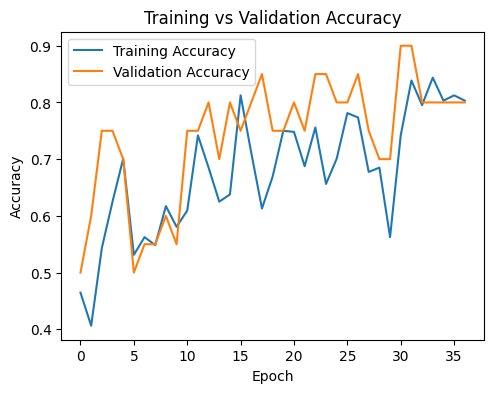

In [39]:
import matplotlib.pyplot as plt

# TRAING VS ACCURACY
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

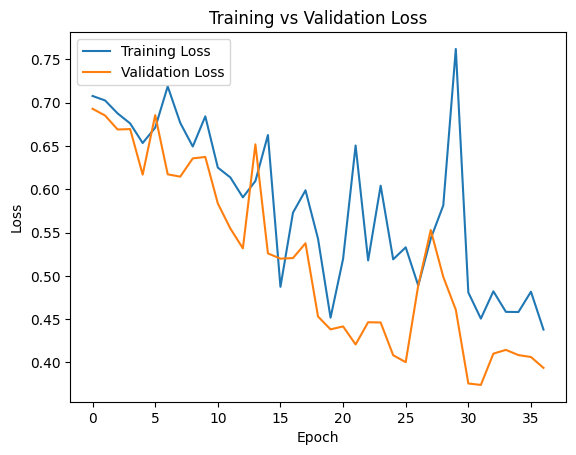

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
Classification Report:
                precision    recall  f1-score   support

Non-Harassment       0.75      0.30      0.43        10
    Harassment       0.56      0.90      0.69        10

      accuracy                           0.60        20
     macro avg       0.66      0.60      0.56        20
  weighted avg       0.66      0.60      0.56        20

Confusion Matrix:
[[3 7]
 [1 9]]


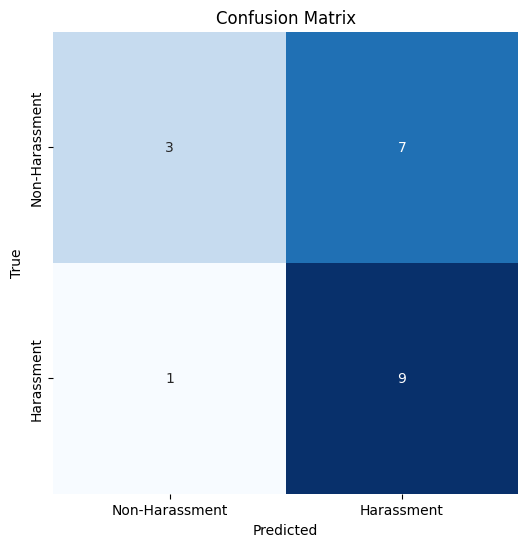

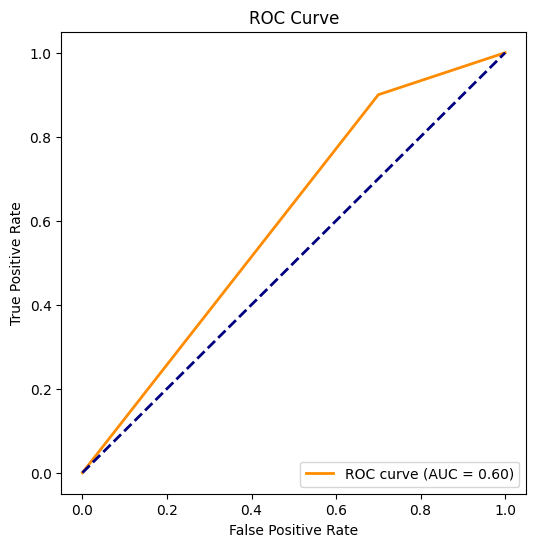

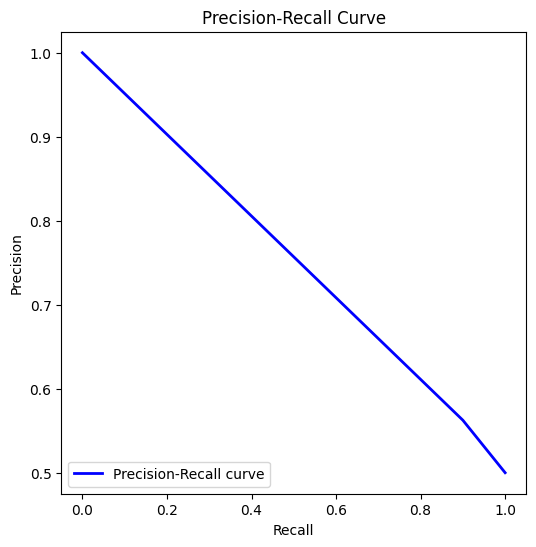

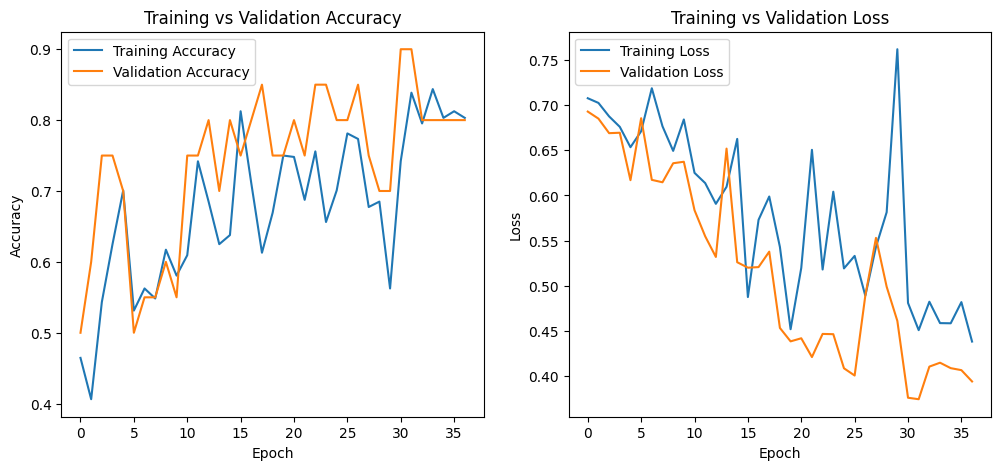

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Harassment', 'Harassment']))
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Harassment', 'Harassment'],
            yticklabels=['Non-Harassment', 'Harassment'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
precision, recall, _ = precision_recall_curve(y_true, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [42]:
# SAVE MODEL
model.save('harassment_classifier.h5')

In [43]:
#MADE PREDICTIONS
from tensorflow.keras.preprocessing import image
import numpy as np

# BY LOADING A SAMPLE IMAGE
img_path = '/content/data_splits/test/harrasment/IMG-20250209-WA0129.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

In [44]:
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Prediction: Harassment")
else:
    print("Prediction: Non-Harassment")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Prediction: Harassment


In [45]:
!pip install gradio==3.35.2

  Using cached gradio-3.35.2-py3-none-any.whl.metadata (15 kB)
Using cached gradio-3.35.2-py3-none-any.whl (19.7 MB)
  Attempting uninstall: gradio
    Found existing installation: gradio 5.22.0
    Uninstalling gradio-5.22.0:
      Successfully uninstalled gradio-5.22.0


In [46]:
!pip install --upgrade gradio

  Using cached gradio-5.22.0-py3-none-any.whl.metadata (16 kB)
Using cached gradio-5.22.0-py3-none-any.whl (46.2 MB)
  Attempting uninstall: gradio
    Found existing installation: gradio 3.35.2
    Uninstalling gradio-3.35.2:
      Successfully uninstalled gradio-3.35.2


In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img):
    try:

        img = img.resize((224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        prediction = model.predict(img_array)
        if prediction[0] > 0.5:
            return "NON-Harassment"
        else:
            return "Harassment"
    except Exception as e:
        return f"Error: {str(e)}"

In [48]:
import gradio as gr

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Image"),
    outputs="text",
    title="Harassment vs Non-Harassment Classifier",
    description="Upload an image from your local machine to classify it as Harassment or Non-Harassment."
)
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35c4a9d22f2ff5afe2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
